### CIS 9 - Lab 3a

Supervised Learning: Regression and Classification

In [48]:
# Name: Aaron Jiang
# 25/25

In this lab you will select a machine learning model to determine a wine characteristic based on its physical and chemical properties.

In [49]:
# import modules
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as clr
import re
import sklearn.linear_model as lm
from sklearn.model_selection import train_test_split
from sklearn import metrics
%matplotlib inline
plt.style.use('fivethirtyeight')



__Part A__ <br>
Train a model to predict whether a wine is white wine or red wine, given the attributes of the wine.<br>
The data is in the file `wine.csv` ([source](https://www.kaggle.com/datasets/ruthgn/wine-quality-data-set-red-white-wine))

1. __Read in data__ from the `wine.csv` file<br>
Then __print the number of rows and columns of the DataFrame__, and __print the first 5 rows__

In [50]:
df = pd.read_csv('wine.csv')
print('rows: ' + str(df.shape[0]) + '\ncolumns: ' + str(df.shape[1]))
df.head()

rows: 6497
columns: 13


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


2. First we inspect the data.<br>
Write code to __show whether the y labels (white wine or red wine) are balanced__.<br>
Then __create a Raw NBConvert cell to print "balanced" or "not balanced"__ as your conclusion based on your code output.<br>
Recall that balanced data means that there is approximately the same number of each type of data.

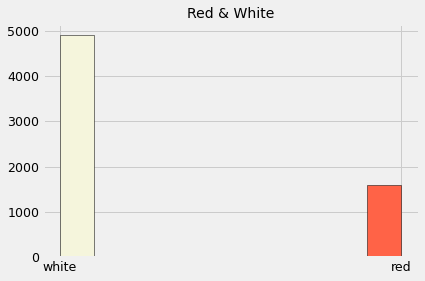

In [51]:
df.type.value_counts()
n, bins, patches = plt.hist(df.type)
plt.title('Red & White',fontsize=14)

colors = ['beige', 'tomato']
for i, (idx, val, patch) in enumerate(zip(n, bins, patches)):
    patch.set_facecolor(colors[i % len(colors)])
    patch.set_edgecolor('black')

In [52]:
### nice use of plot to visualize the difference

3. Fortunately most of the attributes are numeric data, but the wine type is a string.<br>
__Change the wine _type_ into a number__.<br>
Then __print the DataFrame__ to show the change (use Jupyter Notebook print).

In [53]:
df.type = df.type.apply(lambda x: int(x == 'red'))
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,0,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,0,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,0,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,0,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,1,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,1,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
6494,1,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,1,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


4. Now that we have all numeric data, we can look at an overview of the data.<br>
Write code to __check whether there are NaN__ in any column.

In [54]:
df.isna().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

5. __Create a plot with subplots to show the distribution of each column of data__.<br>
Each subplot is for one column of data.<br>
Make sure to have a title for each subplot so show which column it is.

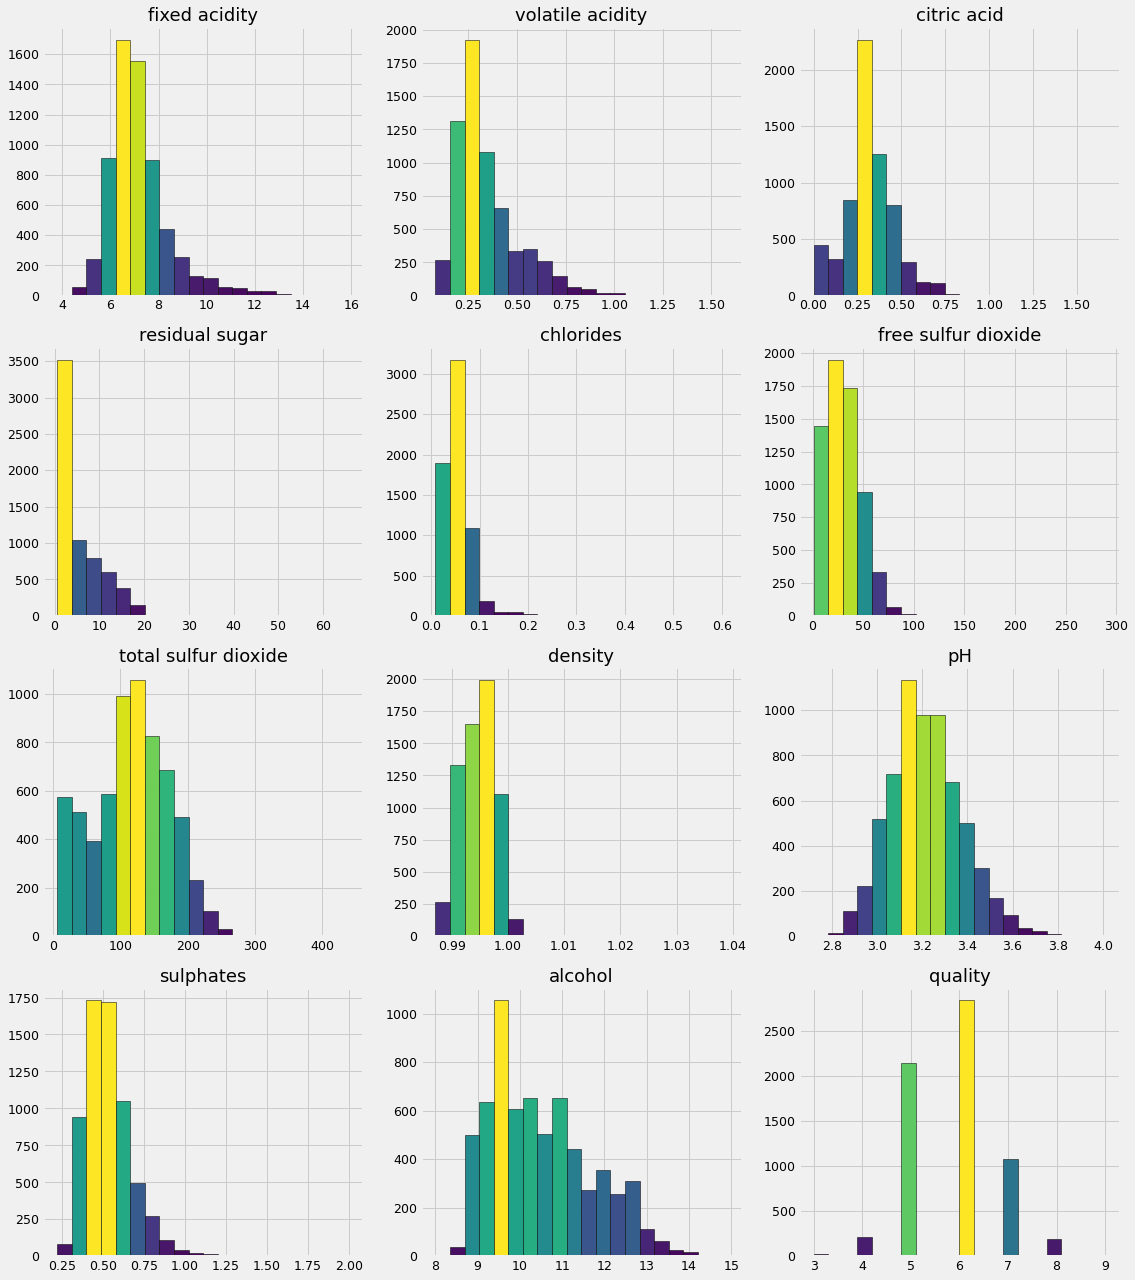

In [55]:
myit = iter(list(df.columns[1:]))
fig, axs = plt.subplots(4,3,figsize=(16,18),tight_layout=True)
plt.rc('xtick', labelsize=12.5) 
plt.rc('ytick', labelsize=12.5) 
plt.subplots_adjust(left=0.125,right=0.9,bottom=0.1,top=0.9,wspace=.2,hspace=.3)
title = iter(df.columns[1:])

def coloring(n, patches):
    height = n / n.max()
    norm = clr.Normalize(height.min(),height.max())
    for bar_height, bar in zip(height, patches):
        bar.set_facecolor(plt.cm.viridis(norm(bar_height)))

for i in range(len(axs)):
    for j in range(len(axs[i])):
        title = next(myit)
        axs[i][j].set_title(title,fontsize=18)
        n, bins, patches = axs[i][j].hist(df[title],bins=20,ec='black')
        coloring(n, patches)


plt.show()

In [56]:
### nice job with the plots

6. Observing the distributions, we can see that some, but not all, columns have outliers.<br>
Write code to __remove rows with outlier values in any of the columns__<br>
Then __print the number of rows and columns__ of the DataFrame after the outliers are removed.

Use your judgment when observing the distribution to determine the outlier values that need to be removed.<br>
If you have statistical training and you want to write code to determine the exact outlier values to remove, you can do so, but it's not required.

In [57]:
#df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
q1, q3 = df.quantile(0.25), df.quantile(0.75)
iqr = q3 - q1
lbound, ubound = (q1 - 1.5 * iqr), (q3 + 1.5 * iqr)
df = df[~((df[df.columns[1:]] < lbound) | (df[df.columns[1:]] > ubound)).any(axis=1)]
print('rows: ' + str(df.shape[0]) + '\ncolumns: ' + str(df.shape[1]))
# zscores remove less outliers, but distributions aren't normal (?)

rows: 4840
columns: 13


/var/folders/b2/15kf1gds1n31r7bb_mz7b3km0000gn/T/ipykernel_60205/2920201711.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df[df.columns[1:]] < lbound) | (df[df.columns[1:]] > ubound)).any(axis=1)]


7. Now that we've cleaned and prepared the data, it's time to apply an appropriate type of machine learning model to predict the type of wine: red or white.<br>

__Create the X and y datasets__<br>
Then __print the number of rows and columns__ for X and y.

In [58]:
X = df[df.columns[1:]]
y = pd.Series(df.type)
print('(X) rows: ' + str(X.shape[0]) + '\ncolumns: ' + str(X.shape[1]))
print('(y) rows: ' + str(len(y)) + '\ncolumns: ' + str(y.ndim))


(X) rows: 4840
columns: 12
(y) rows: 4840
columns: 1


8. __Create the X and y training and testing datasets__<br>
Then __print the number of rows and columns of each set__

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25)
print('X training: ' + str(X_train.shape[0]) + ' rows, ' + str(X_train.shape[1]) + ' columns')
print('X testing: ' + str(X_test.shape[0]) + ' rows, ' + str(X_test.shape[1]) + ' columns')
print('y training: ' + str(y_train.shape[0]) + ' rows, ' + str(y_train.ndim) + ' columns')
print('y testing: ' + str(y_test.shape[0]) + ' rows, ' + str(y_test.ndim) + ' columns')


X training: 3630 rows, 12 columns
X testing: 1210 rows, 12 columns
y training: 3630 rows, 1 columns
y testing: 1210 rows, 1 columns


9. __Create, train, test, and evaluate the accuracy of _all_ the appropriate machine learning models__ that we've discussed in class to predict the wine type.<br>

- It's a good idea to create one or more Code cells for _each_ type of machine learning model.<br>(Don't have one huge Code cell that has all the models, it makes debugging more difficult)
- For each model, make sure to show all the accuracy measurements that we've discussed in class for the model.<br>
(Hint: there is more than one measurement)

In [60]:
from sklearn.tree import DecisionTreeClassifier
tregr = DecisionTreeClassifier()
tregr = tregr.fit(X_train, y_train)
y_pred = tregr.predict(X_test)
tf = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
#print(tf.shape)
print('Accuracy:', np.round(metrics.accuracy_score(y_test, y_pred),4))
print('F1 Score:', np.round(metrics.f1_score(y_test, y_pred, average='weighted'),4))
print('Confusion Matrix:\n',metrics.confusion_matrix(y_test, y_pred, labels=np.arange(0,2)))
tf

Accuracy: 0.9884
F1 Score: 0.9883
Confusion Matrix:
 [[1030    3]
 [  11  166]]


,Actual,Predicted
5526,1,1
2693,0,0
2004,0,0
3385,0,0
2185,0,0
...,...,...
5834,1,1
2432,0,0
1921,0,0
3020,0,0


In [61]:
### don't need to print the comparison DataFrame above, it's too large to be useful
### no one will really compare 1200 data points by viewing them

Accuracy: 0.943
F1 Score: 0.9413
Confusion Matrix:
 [[1010   23]
 [  46  131]]


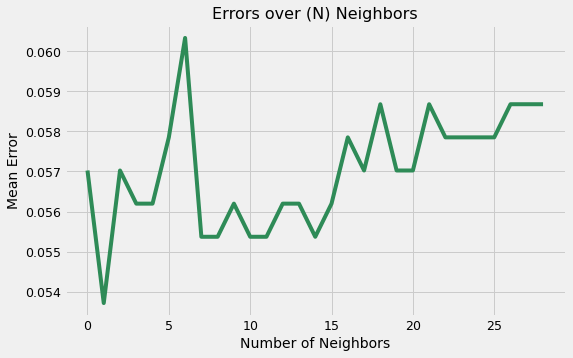

In [62]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 3)
classifier = classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
kf = pd.DataFrame({'Actual': y_test, 'Predicted':y_pred})
#print(tf.shape)
print('Accuracy:', np.round(metrics.accuracy_score(y_test, y_pred),4))
print('F1 Score:', np.round(metrics.f1_score(y_test, y_pred, average='weighted'),4))
print('Confusion Matrix:\n',metrics.confusion_matrix(y_test, y_pred, labels=np.arange(0,2)))
features = pd.DataFrame(tregr.feature_importances_, X.columns, columns=['importance'])
errors = []
for i in range(1,30):
    c = KNeighborsClassifier(n_neighbors = i)
    c.fit(X_train, y_train)
    y_pred = c.predict(X_test)
    errors.append(np.mean(y_pred != y_test))
plt.figure(figsize=(8,5))
plt.plot(errors,color='seagreen')
plt.title('Errors over (N) Neighbors',fontsize=16)
plt.ylabel('Mean Error',fontsize=14)
plt.xlabel('Number of Neighbors',fontsize=14)
plt.show()

In [63]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)
nf = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
print(nf.shape)
print('Accuracy:', np.round(metrics.accuracy_score(y_test, y_pred),4))
print('F1 Score:', np.round(metrics.f1_score(y_test, y_pred, average='weighted'),4))
print('Confusion Matrix:\n',metrics.confusion_matrix(y_test, y_pred, labels=np.arange(0,2)))
nf

(1210, 2)
Accuracy: 0.9893
F1 Score: 0.9892
Confusion Matrix:
 [[1027    6]
 [   7  170]]


,Actual,Predicted
5526,1,1
2693,0,0
2004,0,0
3385,0,0
2185,0,0
...,...,...
5834,1,1
2432,0,0
1921,0,0
3020,0,0


In [64]:
### don't need to print the comparison DataFrame above

10. Determine the most accurate model from the output of step 9.<br>
__Create a Raw NBConvert cell to explain in detail _each_ accuracy number of the most accurate model__.

In [65]:
### good analysis

---

__Part B__<br>
Using the same cleaned and prepped wine dataset as Part A, use an appropriate type of machine learning model to predict the _alcohol_ percentage in a wine.<br>
'Cleaned and prepped' means all NaNs and outliers are accounted for, and all values are numbers.

11. __Create the X and y datasets__<br>
Then __print the number of rows and columns of each set__
and __print the first 5 rows of the X dataset__

In [66]:
X = df.drop(columns=['alcohol'])
y = pd.Series(df.alcohol)
print('(X) rows: ' + str(X.shape[0]) + '\ncolumns: ' + str(X.shape[1]))
print('(y) rows: ' + str(len(y)) + '\ncolumns: ' + str(y.ndim))


(X) rows: 4840
columns: 12
(y) rows: 4840
columns: 1


12. __Create the X and y training and testing datasets__<br>
Then __print the number of rows and columns of each set__

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25)
print('X training: ' + str(X_train.shape[0]) + ' rows, ' + str(X_train.shape[1]) + ' columns')
print('X testing: ' + str(X_test.shape[0]) + ' rows, ' + str(X_test.shape[1]) + ' columns')
print('y training: ' + str(y_train.shape[0]) + ' rows, ' + str(y_train.ndim) + ' columns')
print('y testing: ' + str(y_test.shape[0]) + ' rows, ' + str(y_test.ndim) + ' columns')

X training: 3630 rows, 12 columns
X testing: 1210 rows, 12 columns
y training: 3630 rows, 1 columns
y testing: 1210 rows, 1 columns


13. __Create and train an appropriate model__ to predict the alcohol percentage of the wine.<br>
Then __show the influence of each X feature on the y output__.

In [68]:
from sklearn.tree import DecisionTreeRegressor
regr = DecisionTreeRegressor()
regr = regr.fit(X_train, y_train)
features = pd.DataFrame(regr.feature_importances_, X.columns, columns=['importance'])
print(np.round(features.sort_values(by=['importance'],ascending=False),4))


                      importance
density                   0.6839
residual sugar            0.1079
fixed acidity             0.0413
type                      0.0291
sulphates                 0.0241
pH                        0.0237
volatile acidity          0.0220
chlorides                 0.0218
citric acid               0.0170
total sulfur dioxide      0.0142
free sulfur dioxide       0.0093
quality                   0.0055


14. __Test the model__, then __show the accuracy of the model__.<br>
Make sure to show all the accuracy measurements we've discussed in class for this model.

In [69]:
y_pred = regr.predict(X_test)
treef = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.round(RMSE,3),'|', f'{RMSE/np.mean(y):.2%}', 'percent error')
print('R^2 Value:', np.round(regr.score(X,y),3))
treef


RMSE: 0.529 | 5.02% percent error
R^2 Value: 0.949


,Actual,Predicted
360,10.2,10.6
6072,9.5,9.5
2218,10.5,10.6
2845,10.9,10.8
4767,9.4,10.0
...,...,...
2405,9.5,9.5
1449,11.5,11.4
4063,9.7,9.4
3966,9.5,9.5


In [70]:
### don't need to print the comparison DataFrame above

15a. Based on the output of step 13, determine which X feature has the most influence in predicting the alcohol level.<br>
Then __use an appropriate plot to show the correlation between this X feature and the y label__

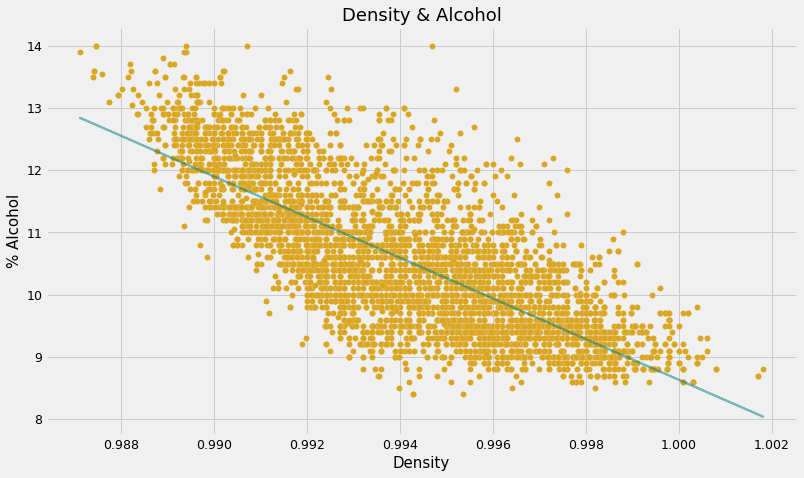

335.07781428672916

In [71]:
from scipy import stats
line = stats.linregress(X.density, y)
fig = plt.figure(figsize=(12,7))
plt.title('Density & Alcohol',fontsize=18)
plt.ylabel('% Alcohol',fontsize=15)
plt.xlabel('Density',fontsize=15)
plt.plot(X.density,(line.intercept + line.slope * X.density),lw=2,color='teal',alpha=.5)
plt.scatter(X.density, y, color = 'goldenrod', lw=0.1, ec='white')
plt.show()
line.intercept


15b. __Create a Raw NBConvert cell to explain whether the plot agrees with the output of step 13 for this X feature__

16. Using the same X and y training and testing datasets as step 12, __create, train, test, and find the accuracy of another model__ that can predict the alcohol level of the wine.

In [72]:
regr = lm.LinearRegression()
regr = regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
lf = pd.DataFrame({'Actual': y_test, 'Predicted': np.round(y_pred,2)})
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.round(RMSE,3),'|', f'{RMSE/np.mean(y):.2%}', 'percent error')
print('R^2:', np.round(regr.score(X,y),3))
lf
            

RMSE: 0.386 | 3.67% percent error
R^2: 0.893


,Actual,Predicted
360,10.2,10.51
6072,9.5,9.74
2218,10.5,11.01
2845,10.9,11.18
4767,9.4,9.67
...,...,...
2405,9.5,9.49
1449,11.5,11.00
4063,9.7,9.54
3966,9.5,9.57


In [73]:
### don't need to print the comparison DataFrame above

17. __Show the contribution of each X feature on the y output__.<br>
Then __Create a Raw NBConvert Cell to explain whether the most influential X feature is the same one as in the previous model__.

In [74]:
coeff = pd.DataFrame(regr.coef_, X.columns, columns=['Coefficient'])
coeff.sort_values(by=['Coefficient'], key=abs, ascending=False)


,Coefficient
density,-718.763845
pH,2.504090
chlorides,1.610598
type,1.330544
sulphates,1.035226
volatile acidity,0.677933
citric acid,0.667858
fixed acidity,0.540832
residual sugar,0.242895
quality,0.040873


In [75]:
### great job with the analyses and plots throughout the notebook